In [1]:
import requests
from requests_oauthlib import OAuth1

In [476]:
import cnfg
config = cnfg.load(".yelp_config")

oauth = OAuth1(config["Consumer_Key"],
               config["Consumer_Secret"],
               config["Token"],
               config["Token_Secret"])

from pymongo import MongoClient
import time
client = MongoClient()
har_db = client.har_db
har_col2 = har_db.har_bus2

In [479]:
for i in range(1000,14461,20):
    response = requests.get("https://api.yelp.com/v2/search/?location=Harlem, New York&offset="+str(i)+"&limit=20",
                        auth=oauth)
    har_col2.insert(response.json()["businesses"])
    time.sleep(1.0)


KeyError: 'businesses'

In [41]:
1000/20

50

In [44]:
cursor = har_col.find().limit(2)
cursor.next()
list(cursor)

[{u'_id': ObjectId('55e609a5adcc6c21828fccca'),
  u'categories': [[u'Coffee & Tea', u'coffee']],
  u'display_phone': u'+1-212-234-2024',
  u'id': u'sugar-hill-cafe-new-york',
  u'image_url': u'http://s3-media2.fl.yelpcdn.com/bphoto/vZ_irkfVHNjFJqgxqr2ftQ/ms.jpg',
  u'is_claimed': True,
  u'is_closed': False,
  u'location': {u'address': [u'410 W 145th St'],
   u'city': u'New York',
   u'coordinate': {u'latitude': 40.824108, u'longitude': -73.945678},
   u'country_code': u'US',
   u'cross_streets': u'St Nicholas Ave & Convent Ave',
   u'display_address': [u'410 W 145th St', u'Harlem', u'New York, NY 10031'],
   u'geo_accuracy': 8.0,
   u'neighborhoods': [u'Harlem'],
   u'postal_code': u'10031',
   u'state_code': u'NY'},
  u'mobile_url': u'http://m.yelp.com/biz/sugar-hill-cafe-new-york',
  u'name': u'Sugar Hill Cafe',
  u'phone': u'2122342024',
  u'rating': 4.5,
  u'rating_img_url': u'http://s3-media2.fl.yelpcdn.com/assets/2/www/img/99493c12711e/ico/stars/v1/stars_4_half.png',
  u'rating_

In [48]:
a = list(har_col.find())
print type(har_col),len(a)

 <class 'pymongo.collection.Collection'> 1000


In [58]:
har_raw_df = pd.DataFrame(list(har_col.find()))

In [69]:
har_raw_loc = pd.DataFrame(list(har_raw_df.location))

In [84]:
har_df = pd.concat([har_raw_df["id"],har_raw_df["name"],har_raw_df["categories"],har_raw_df["is_closed"],har_raw_df["review_count"],har_raw_df["rating"],har_raw_loc["coordinate"],har_raw_loc["neighborhoods"],har_raw_loc["postal_code"]], axis=1)

In [94]:
har_df.postal_code.value_counts()

10027    328
10031    238
10026    170
10030    114
10037     57
10039     55
10032     11
10025      6
10035      3
10454      3
10010      2
10029      2
10115      1
10002      1
10021      1
10024      1
10023      1
10018      1
10036      1
10001      1
dtype: int64

In [ ]:
#Date Scraping

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
type(har_df["id"])

NameError: name 'har_df' is not defined

In [88]:
har_df["id"] = har_df["id"].str.replace("-","_")

In [481]:
har_df

,id,name,categories,is_closed,review_count,rating,coordinate,neighborhoods,postal_code
0,serengeti_teas_and_spices_new_york,Serengeti Teas & Spices,"[[Coffee & Tea, coffee], [Tea Rooms, tea]]",False,94,4.5,"{u'latitude': 40.808929, u'longitude': -73.951...",[Harlem],10027
1,sugar_hill_cafe_new_york,Sugar Hill Cafe,"[[Coffee & Tea, coffee]]",False,68,4.5,"{u'latitude': 40.824108, u'longitude': -73.945...",[Harlem],10031
2,abyssinia_ethiopian_restaurant_new_york,Abyssinia Ethiopian Restaurant,"[[Ethiopian, ethiopian]]",False,111,4.5,"{u'latitude': 40.8158229565, u'longitude': -73...",[Harlem],10030
3,pisticci_new_york,Pisticci,"[[Italian, italian]]",False,467,4.0,"{u'latitude': 40.8140405, u'longitude': -73.95...",[Harlem],10027
4,seasoned_vegan_new_york_2,Seasoned Vegan,"[[Vegan, vegan], [Vegetarian, vegetarian]]",False,234,4.5,"{u'latitude': 40.8006489, u'longitude': -73.95...",[Harlem],10026
5,kuro_kuma_espresso_and_coffee_new_york,Kuro Kuma Espresso & Coffee,"[[Coffee & Tea, coffee]]",False,83,4.5,"{u'latitude': 40.814091, u'longitude': -73.959...",[Harlem],10027
6,lolos_seafood_shack_new_york,LoLo's Seafood Shack,"[[Seafood, seafood], [Sandwiches, sandwiches]]",False,116,4.5,"{u'latitude': 40.8048592, u'longitude': -73.95...",[Harlem],10026
7,yuzu_new_york,Yuzu,"[[Sushi Bars, sushi], [Japanese, japanese]]",False,55,4.5,"{u'latitude': 40.8093109, u'longitude': -73.94...",[Harlem],10027
8,yolandas_tamales_new_york,Yolanda's Tamales,"[[Mexican, mexican], [Food Stands, foodstands]]",False,16,5.0,"{u'latitude': 40.8215870708, u'longitude': -73...",[Harlem],10031
9,jin_ramen_new_york,Jin Ramen,"[[Ramen, ramen]]",False,685,4.0,"{u'latitude': 40.8154774, u'longitude': -73.95...",[Harlem],10027


In [116]:
x = []
y = x+[2,3]+[1,2]
print y

[2, 3, 1, 2]


In [3]:
url0 = "https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm"
response = requests.get(url0)
page = response.text
soup = BeautifulSoup(page)
zip_code_ls = []
for zip_code in soup.findAll(headers="header3"):
    zip_code_ls = zip_code_ls + str(zip_code.getText()).split(',')


/usr/local/lib/python2.7/site-packages/beautifulsoup4-4.4.0-py2.7.egg/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")



In [4]:
zip_code = map(int,zip_code_ls)

In [5]:
demo_dict = {}
for val in zip_code:
    url1 = "http://www.city-data.com/zips/{zi}.html".format(zi = val)
    response = requests.get(url1)
    page = response.text
    soup = BeautifulSoup(page)

    demo_dict[val] = soup

In [6]:
print len(demo_dict)

178


In [7]:
print len(demo_dict)
del demo_dict[11695]
print len(demo_dict)

178
177


'[<html lang="en">\\n<head>\\n<meta charset="unicode-escape"/>\\n<meta content="en" http-equiv="Content-Language"/>\\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\\n<meta content="index, follow" name="robots"/>\\n<meta content="all" name="robots"/>\\n<meta content="all" name="googlebot"/>\\n<meta msnbot="all" name="msnbot"/>\\n<meta content="YES" name="apple-mobile-web-app-capable"/>\\n<meta content="width=device-width, initial-scale=1" name="viewport"/>\\n<!-- Quantcast Tag, part 1 -->\\n<script type="text/javascript">\\n  var _qevents = _qevents || [];\\n  (function() {\\n  var elem = document.createElement(\'script\');\\n  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")\\n  + ".quantserve.com/quant.js";\\n  elem.async = true;\\n  elem.type = "text/javascript";\\n  var scpt = document.getElementsByTagName(\'script\')[0];\\n  scpt.parentNode.insertBefore(elem, scpt);\\n  })();\\n</script>\\n<script type="text/javascript">window.ua={mobi
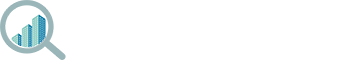
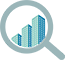
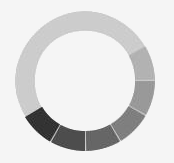
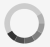
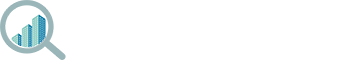
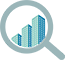
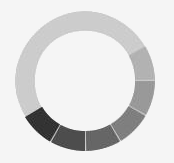
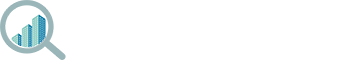
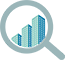
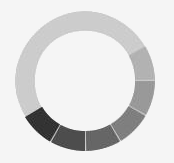
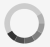
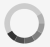

In [22]:
str(demo_dict[10030].findAll())

In [25]:
from parse import *
#</b></td><td><p class="h" style="padding-left:83px;"></p>$31,925</td></tr><tr><td>
for key in demo_dict:
    try:
        hsh = [x for x in search('Average household size:</b><table><tr><td><b>This zip code:{}<b>', str(demo_dict[key].findAll()))[0].split('>') if 'people' in x]
        print key, hsh, float(hsh[0].split()[0])
    except:
        print key, "error"

10280 ['2.1 people</td'] 2.1
10301 ['2.5 people</td'] 2.5
10302 ['2.9 people</td'] 2.9
10303 ['3.0 people</td'] 3.0
10304 ['2.8 people</td'] 2.8
10305 ['2.8 people</td'] 2.8
10306 ['2.7 people</td'] 2.7
10307 ['3.1 people</td'] 3.1
10308 ['2.8 people</td'] 2.8
10309 ['3.0 people</td'] 3.0
10310 ['3.0 people</td'] 3.0
10312 ['2.8 people</td'] 2.8
10314 ['2.8 people</td'] 2.8
11354 ['2.7 people</td'] 2.7
11355 ['2.9 people</td'] 2.9
11356 ['3.0 people</td'] 3.0
11357 ['2.7 people</td'] 2.7
11358 ['2.9 people</td'] 2.9
11359 ['2.1 people</td'] 2.1
11360 ['2.3 people</td'] 2.3
11361 ['2.8 people</td'] 2.8
11362 ['2.5 people</td'] 2.5
11363 ['2.8 people</td'] 2.8
11364 ['2.6 people</td'] 2.6
11365 ['2.7 people</td'] 2.7
11366 ['3.1 people</td'] 3.1
11367 ['2.8 people</td'] 2.8
11368 ['3.8 people</td'] 3.8
11369 ['3.5 people</td'] 3.5
11370 ['3.2 people</td'] 3.2
11372 ['2.6 people</td'] 2.6
11373 ['3.1 people</td'] 3.1
11374 ['2.2 people</td'] 2.2
11375 ['2.1 people</td'] 2.1
11377 ['2.7 pe

In [26]:
from parse import *
pop_dict = []
for key in demo_dict:
    a = {}
    try:
        a['postal_code']=key
        a['population']=int(filter(lambda x: x.isdigit(), search('zip code population in 2013:</b> {}<br/>', str(demo_dict[key].findAll(class_='row')))[0]))
        income = [x for x in search('Estimated median household income in 2013: </b></b><table><tr><td><b>This zip code:{}<b>', str(demo_dict[key].findAll()))[0].split('>') if '$' in x]
        a['median_income'] = int(filter(lambda x: x.isdigit(), income[0]))
        hsh = [x for x in search('Average household size:</b><table><tr><td><b>This zip code:{}<b>', str(demo_dict[key].findAll()))[0].split('>') if 'people' in x]
        a['household_size'] = float(hsh[0].split()[0])
    except:
        if key == 11359:
            a['postal_code']=key
            a['population']=5963
            a['median_income'] = 73237
            hsh = [x for x in search('Average household size:</b><table><tr><td><b>This zip code:{}<b>', str(demo_dict[key].findAll()))[0].split('>') if 'people' in x]
            a['household_size'] = float(hsh[0].split()[0])
        elif key == 10020:
            a['postal_code']=key
            a['population']=70
            a['median_income'] = 91974
            hsh = [x for x in search('Average household size:</b><table><tr><td><b>This zip code:{}<b>', str(demo_dict[key].findAll()))[0].split('>') if 'people' in x]
            a['household_size'] = float(hsh[0].split()[0])
    pop_dict.append(a)

In [27]:
pop_dict

[{'household_size': 2.1,
  'median_income': 129574,
  'population': 8685,
  'postal_code': 10280},
 {'household_size': 2.5,
  'median_income': 56848,
  'population': 38885,
  'postal_code': 10301},
 {'household_size': 2.9,
  'median_income': 56841,
  'population': 16811,
  'postal_code': 10302},
 {'household_size': 3.0,
  'median_income': 51537,
  'population': 24537,
  'postal_code': 10303},
 {'household_size': 2.8,
  'median_income': 53168,
  'population': 43084,
  'postal_code': 10304},
 {'household_size': 2.8,
  'median_income': 70758,
  'population': 42006,
  'postal_code': 10305},
 {'household_size': 2.7,
  'median_income': 75807,
  'population': 55902,
  'postal_code': 10306},
 {'household_size': 3.1,
  'median_income': 86457,
  'population': 14829,
  'postal_code': 10307},
 {'household_size': 2.8,
  'median_income': 88075,
  'population': 28939,
  'postal_code': 10308},
 {'household_size': 3.0,
  'median_income': 86297,
  'population': 32646,
  'postal_code': 10309},
 {'househo

In [28]:
import pandas as pd
pop_df = pd.DataFrame(pop_dict)

In [29]:
pop_df.to_csv("pop_zip.csv")

In [30]:
pop_df.head()

,household_size,median_income,population,postal_code
0,2.1,129574,8685,10280
1,2.5,56848,38885,10301
2,2.9,56841,16811,10302
3,3.0,51537,24537,10303
4,2.8,53168,43084,10304


In [32]:
for zi in demo_dict2:
    demo_dict["postal_code"].append(int(zi))
    #Median Household Income
    if zi in[10065,10075]:
        demo_dict["median_household_income"].append([i.getText() for i in soup.findAll('td') if '$' in i.getText()][28])
    elif zi == 11359:
        demo_dict["median_household_income"].append([i.getText() for i in soup.findAll('td') if 'This zip code:$' in i.getText()])
    else:
        demo_dict["median_household_income"].append([i.getText() for i in soup.findAll('td') if '$' in i.getText()][52])
    #HouseHold Size
    if zi in [10019,10027,10012,10021]:
        demo_dict["median_household_size"].append(float([str(i.getText().encode('utf-8')).split()[0] for i in soup.findAll('td') if  'people' in i.getText()][2]))
    elif zi == 10020:
        demo_dict["median_household_size"].append(float([str(i.getText().encode('utf-8')).split()[0] for i in soup.findAll('td') if  'people' in i.getText()][3]))
    elif zi == 11359:
        demo_dict["median_household_size"].append([str(i.getText().encode('utf-8')).split()[0] for i in soup.findAll('td') if  'people' in i.getText()])
    else:
        demo_dict["median_household_size"].append(float([str(i.getText().encode('utf-8')).split()[0] for i in soup.findAll('td') if  'people' in i.getText()][1]))
        #print [str(i.getText().encode('utf-8')).split()[0] for i in soup.findAll('td') if  'people' in i.getText()]

    
    
    return demo_dict
    #print [str(i.getText()).split()[-1] for i in soup.findAll('li') if 'Divorced' in i.getText()][0]

IndentationError: unexpected indent (<ipython-input-32-66ae221a2ad3>, line 3)

In [480]:
print len(zip_code)

178


In [12]:
data_zip(10030)

NameError: name 'data_zip' is not defined

10009
10021
10028
10044
10065
10075
10128
10023
10024
10025
10031
10032
10033
10034
10040
11361
11362
11363
11364
11354
11355
11356
11357
11358


IndexError: list index out of range

In [406]:
demo_data = pd.DataFrame(data_zip(val) for val in zip_code)

ValueError: could not convert string to float: How

In [305]:
data_zip(10026)

$43,107
2.6
17,885
19,986
82.6%
39.3%
17.9%
8.3%
33.7
53.9%
30.4%
4.3%
4.2%
7.1%
33.6
5,342
18,447
89
1,427
25
130
889
7,654
37,871
